In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [102]:
!curl https://course-v3.fast.ai/setup/colab | bash

from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    337      0 --:--:-- --:--:-- --:--:--   337
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'
Mounted at /content/drive


In [103]:
path = Path('/content/drive/My Drive/HackathonProject/training_set') 
os.listdir(path)


['peaceful', 'violent', 'models']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.25, ds_tfms=get_transforms(), size=200, num_workers=0).normalize(imagenet_stats)

In [105]:
print(data.classes)

['peaceful', 'violent']


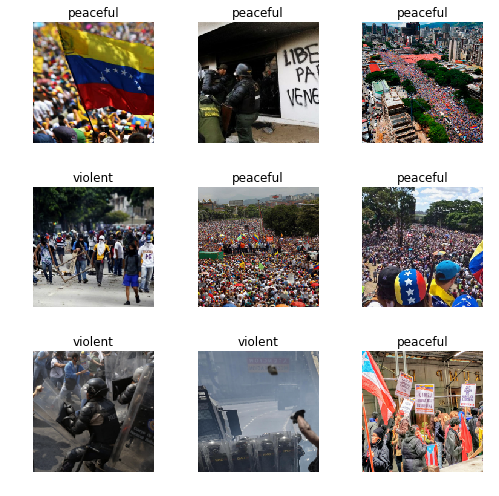

In [106]:
data.show_batch(rows=3, figsize=(7,7))

In [107]:
print(data.classes)
len(data.classes),data.c

['peaceful', 'violent']


(2, 2)

In [108]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['peaceful', 'violent'], 2, 1134, 378)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [110]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [111]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.651546,0.308848,0.867725,01:09
1,0.505630,0.318470,0.870370,01:11
2,0.414552,0.325658,0.870370,01:09
3,0.367204,0.322742,0.862434,01:08
4,0.326916,0.321437,0.873016,01:08
5,0.291269,0.331328,0.867725,01:10
6,0.268311,0.323268,0.873016,01:10
7,0.247616,0.321553,0.873016,01:10


In [112]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

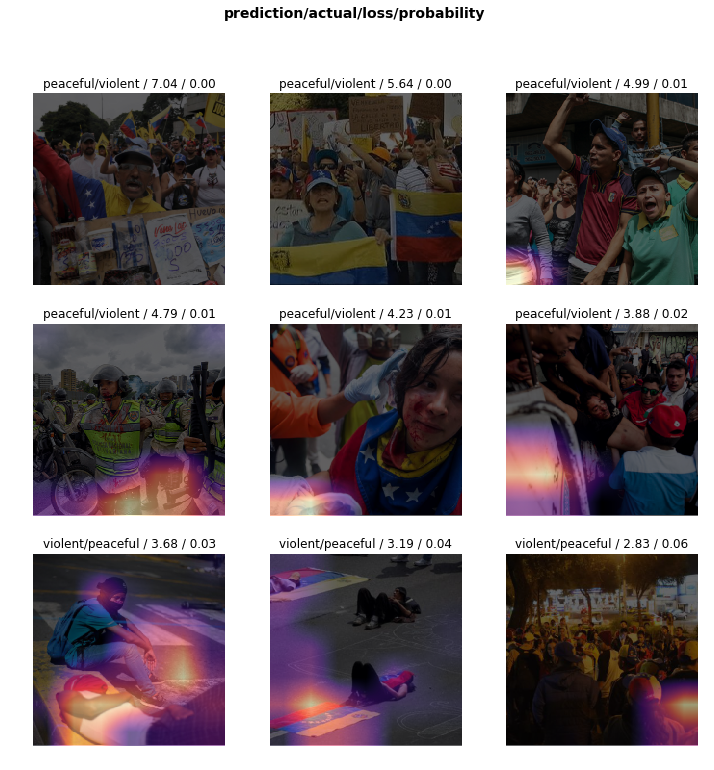

In [113]:

interp.plot_top_losses(9, figsize=(12,12))



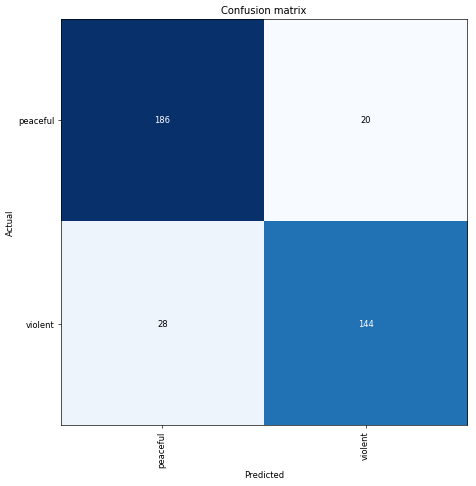

In [114]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)


In [115]:
interp.most_confused(min_val=3) 

[('violent', 'peaceful', 28), ('peaceful', 'violent', 20)]

In [0]:
learn.save('peace_violent34-stage1')

In [0]:
learn.unfreeze()

In [135]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.140962,0.320368,0.867725,01:12


In [0]:
learn.load('peace_violent34-stage1');

In [120]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


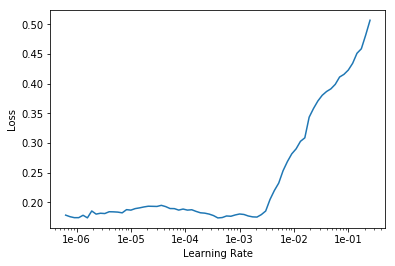

In [121]:
learn.recorder.plot()

In [122]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.235436,0.399611,0.859788,01:10
1,0.191623,0.304023,0.896825,01:12


In [0]:
learn.save('peace_violent34-stage2')

In [0]:
learn50 = cnn_learner(data, models.resnet50, metrics=accuracy)

In [125]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.559230,0.290301,0.883598,01:14
1,0.418600,0.331842,0.896825,01:13
2,0.359275,0.298735,0.904762,01:13
3,0.310366,0.288493,0.904762,01:14
4,0.270780,0.270232,0.891534,01:14
5,0.235255,0.276032,0.902116,01:12
6,0.213318,0.276588,0.896825,01:13
7,0.198732,0.271676,0.899471,01:14


In [126]:
interp50 = ClassificationInterpretation.from_learner(learn50)

losses,idxs = interp50.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

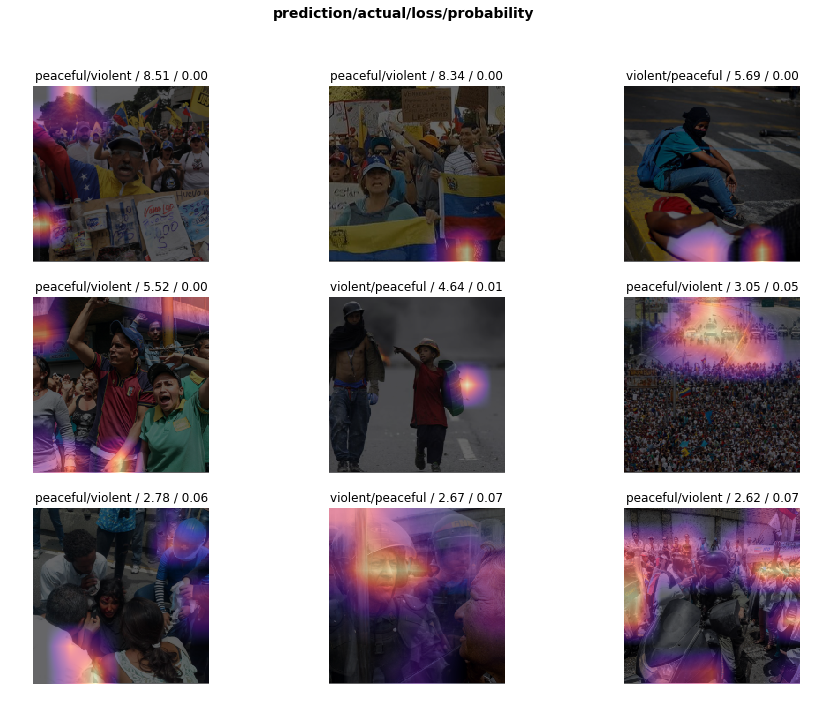

In [127]:
interp50.plot_top_losses(9, figsize=(15,11))

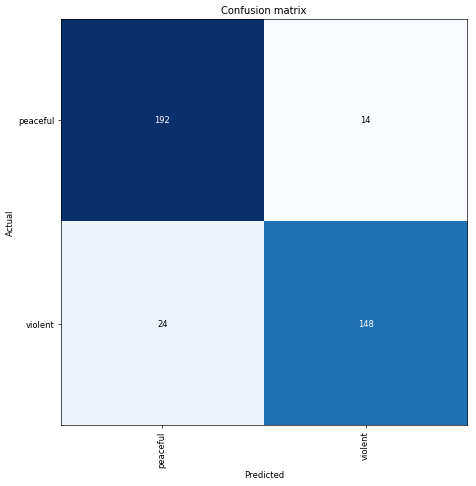

In [128]:
interp50.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [129]:
interp50.most_confused(min_val=1) # actual, predicted, number of occurrences

[('violent', 'peaceful', 24), ('peaceful', 'violent', 14)]

In [0]:
learn50.save('peace_violent50-stage1')

In [0]:
learn50.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


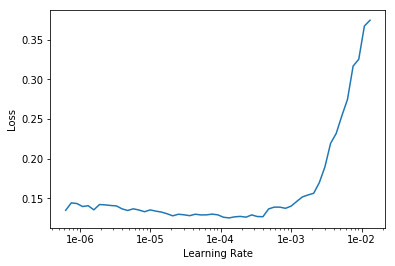

In [132]:
learn50.lr_find()
learn50.recorder.plot()

In [133]:

learn50.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.163925,0.328735,0.899471,01:14
1,0.146117,0.313241,0.904762,01:16
2,0.126901,0.279078,0.915344,01:15
3,0.099298,0.291951,0.912698,01:15


In [0]:
learn50.save('peace_violent50-stage2')